# Praktikum Data Mining Modul 5
Nama : Tri Murniya Ningsih \
NIM : 121450038 \
RC

# Dataset 1

# Praktikum 1 : Implementasi Klasifikasi Naïve Bayes Support Vector Machine (SVM)

## 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Import Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset data mining/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 3. Data analysis / preprocessing

**Data Cleaning**

In [ ]:
missing_data = df.isnull().sum()
print("Jumlah data hilang : ")
print(missing_data)

Jumlah data hilang : 
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


**Pengecekan outlier**

In [ ]:
from scipy.stats import zscore

z_score = zscore(df.select_dtypes(include = [np.number]))

threshold = 3

#membuat dataframe jika true maka ada nilai outlier
outlier = (np.abs(z_score) > threshold)

outlier_count = pd.DataFrame(outlier, columns = df.columns).sum()
print("Jumlah outlier : ")
print(outlier_count)

Jumlah outlier : 
User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64


Karena tidak ada outlier dan tidak ada data yang hilang maka bisa dilakukan visualisasi data

**Data Visualization**

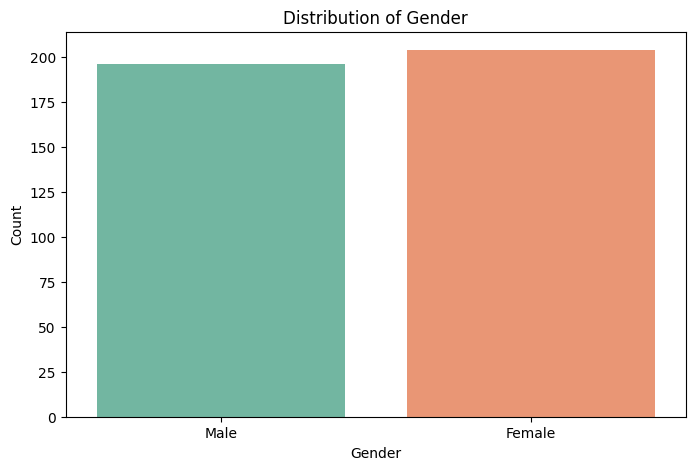

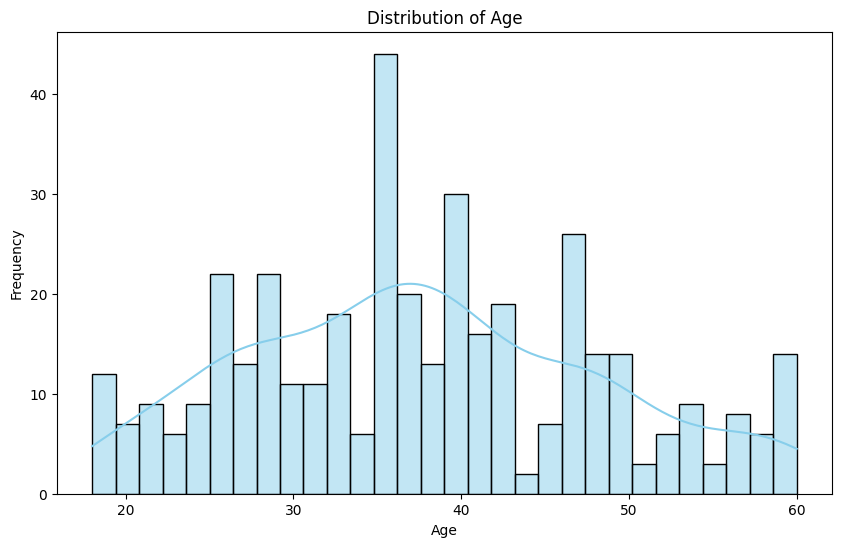

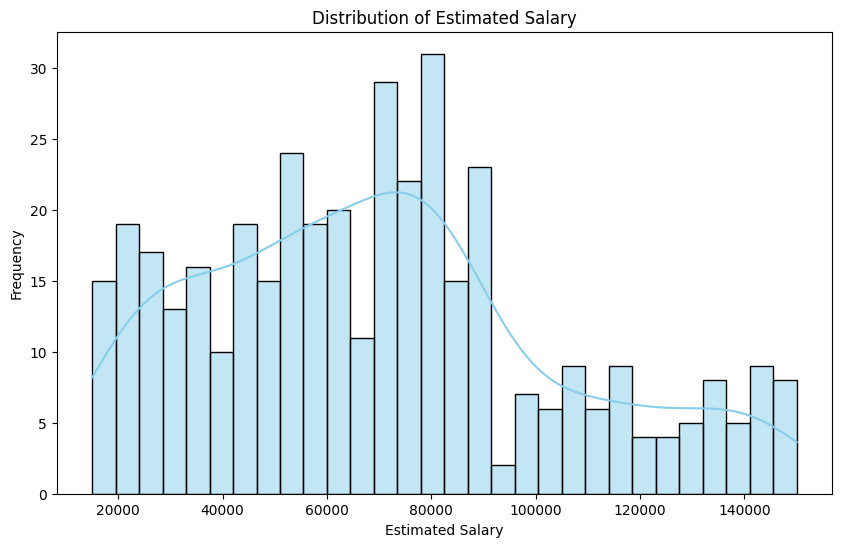

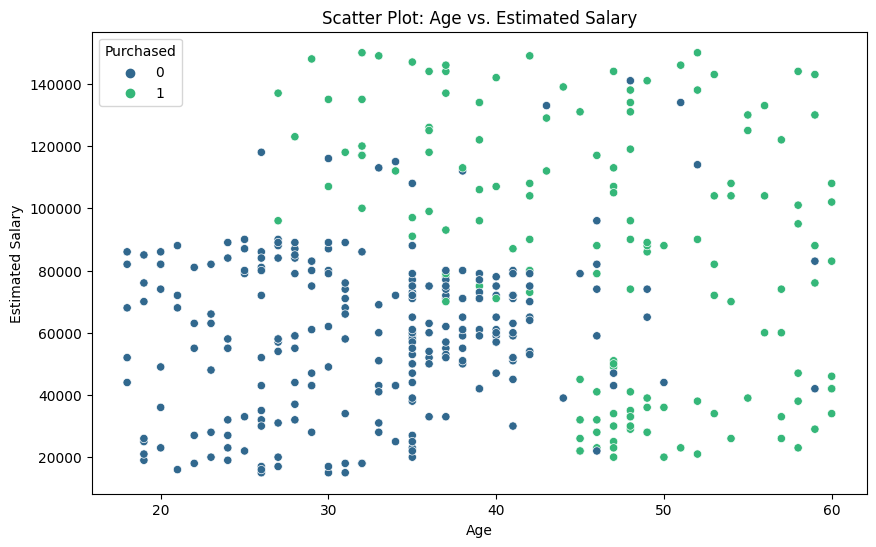

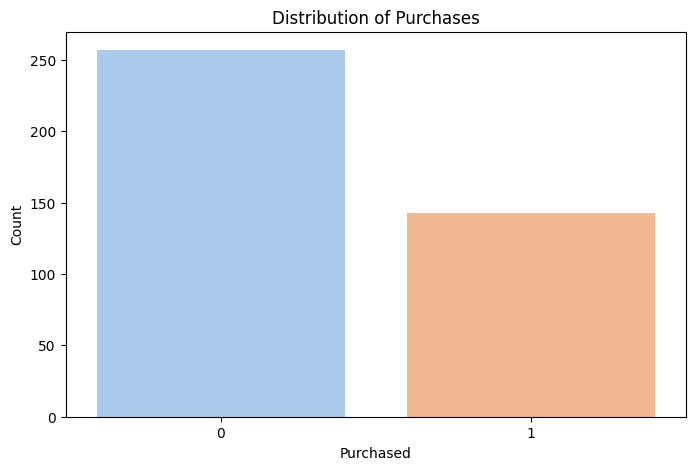

In [ ]:
# Visualisasi Gender menggunakan Count Plot
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Gender', data = df, palette = 'Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualisasi Age menggunakan Histogram
plt.figure(figsize = (10, 6))
sns.histplot(df['Age'], bins = 30, kde = True, color = 'skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualisasi EstimatedSalary menggunakan Histogram
plt.figure(figsize = (10, 6))
sns.histplot(df['EstimatedSalary'], bins = 30, kde = True, color = 'skyblue')
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

# Visualisasi hubungan antara Age dan EstimatedSalary menggunakan Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data = df, palette = 'viridis')
plt.title('Scatter Plot: Age vs. Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

# Visualisasi pembelian (Purchased) menggunakan Count Plot
plt.figure(figsize=(8, 5))
sns.countplot(x = 'Purchased', data = df, palette = 'pastel')
plt.title('Distribution of Purchases')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

a) Hapus kolom yang tidak dibutuhkan

In [ ]:
# menghapus kolom user id
del_col = 'User ID'  # memilih nama kolom yang akan dihapus
df.drop(columns=del_col, inplace=True) # lalu menghapus menggunakan fungsi drop

b) Deskripsi Data

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


c) Distribusi data

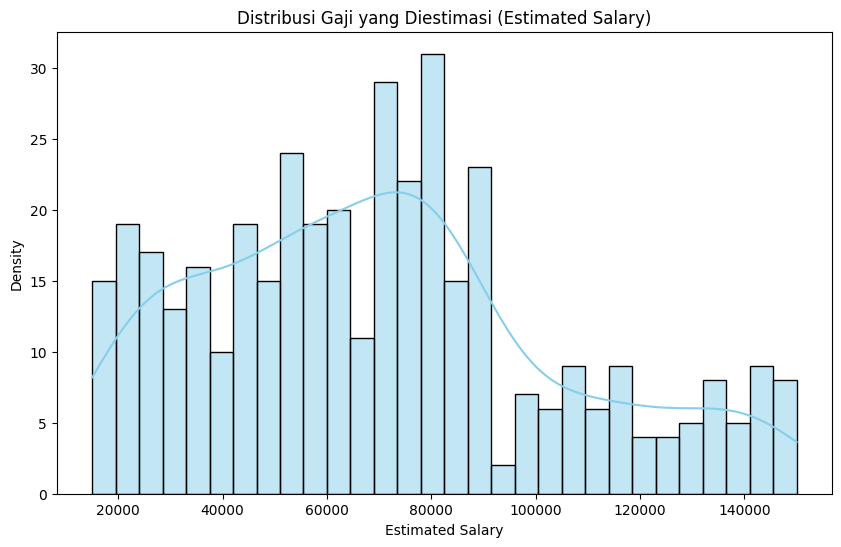

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['EstimatedSalary'], bins = 30, kde = True, color='skyblue')
plt.title('Distribusi Gaji yang Diestimasi (Estimated Salary)')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.show()

d) Label encoding

In [ ]:
df['Gender'] = pd.factorize(df['Gender'])[0]

e) Correlation matrix

In [ ]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


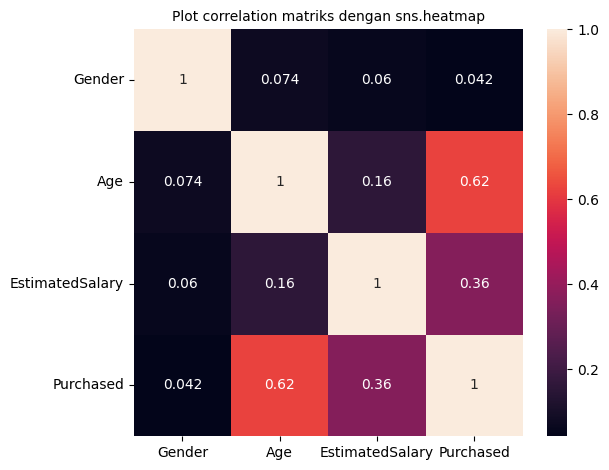

In [ ]:
plt.figure()
sns.heatmap(df.corr(), annot = True)
plt.title('Plot correlation matriks dengan sns.heatmap', size = 10)
plt.tight_layout()
plt.show()

Dari matriks korelasi terlihat bahwa Gender tidak berkorelasi dengan atribut lain sehingga kita bisa menghilangkannya juga dengan melakukan drop data seperti pada
langkah a.

In [ ]:
# menghapus kolom user id
del_col = 'Gender'  # memilih nama kolom yang akan dihapus
df.drop(columns = del_col, inplace = True) # lalu menghapus menggunakan fungsi drop

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## 4. Split Data

a) Variabel independen / dependen

In [ ]:
# split data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

b) Train / Test Split

In [ ]:
# split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

## 5. Feature scaling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 6. Train model

In [ ]:
# Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## 7. Predict result / Score model

In [ ]:
# prediksi
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


## 8. Evaluasi model

a) Akurasi

In [ ]:
# akurasi
accuracy_score(y_test, y_pred)

0.86

b) Classification report

In [ ]:
# classification report
print(f'Classification Report : \n{classification_report(y_test, y_pred)}')

Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



c) F1 score

In [ ]:
# f1 score adalah rata-rata harmonik antara presisi dan recall.
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8333333333333334


d) Confusion matrix

<Axes: >

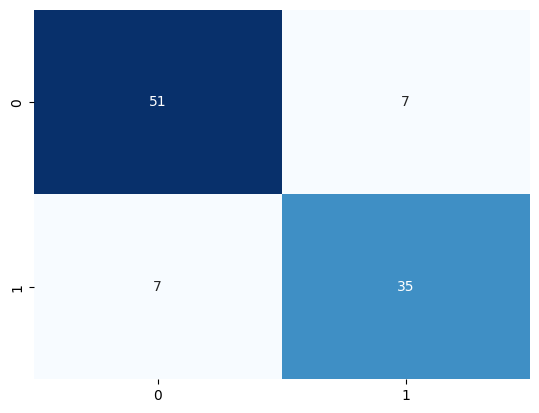

In [ ]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

e) Precision-Recall curve

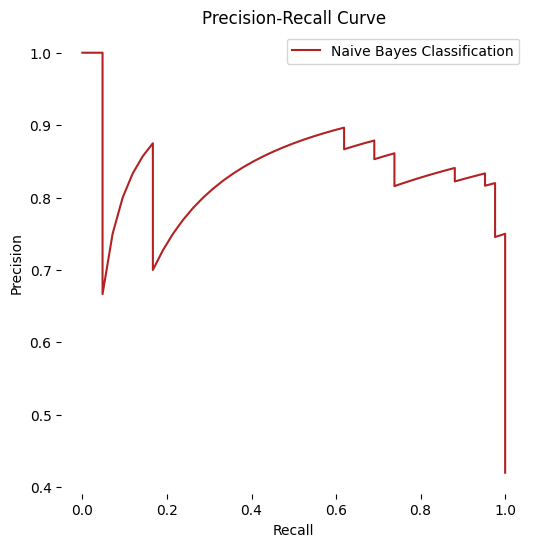

In [ ]:
# plot precision-recall curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6, 6))
ax.plot(recall, precision, label = 'Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

f) AUC/ROC curve

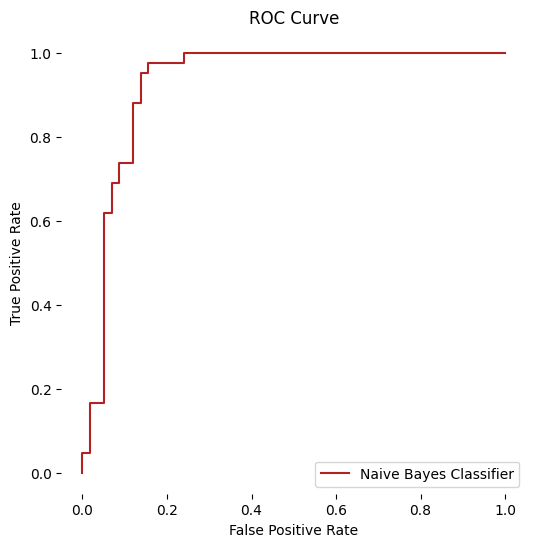

In [ ]:
# plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6, 6))
ax.plot(fpr, tpr, label = 'Naive Bayes Classifier', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

## 9. Visualization predictions

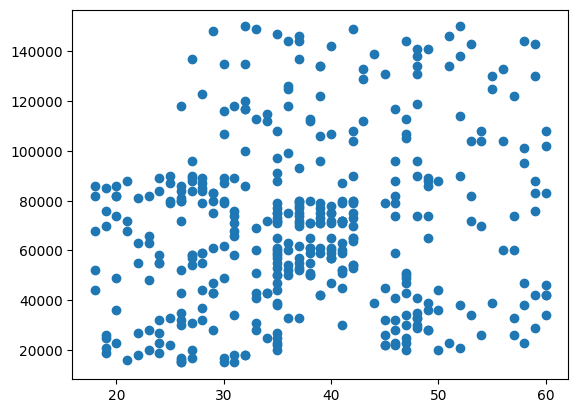

In [ ]:
#Relationship
plt.scatter(df['Age'], df['EstimatedSalary'])

**Prediction results on the training set**

<ipython-input-214-3c72c4326be7>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


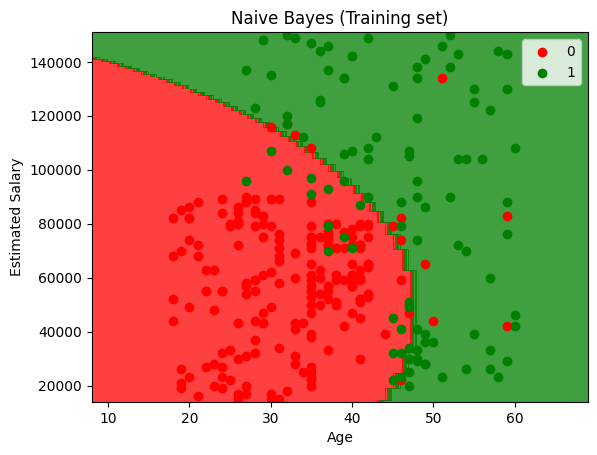

In [ ]:
# visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Prediction results on the test set**

<ipython-input-215-3f5009f6f8ce>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


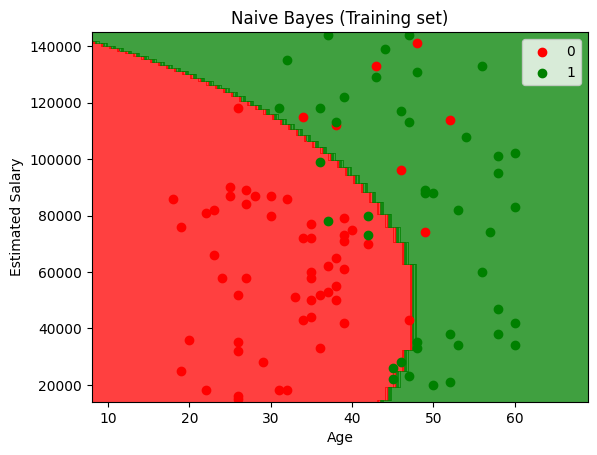

In [ ]:
# visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 10. Example

In [ ]:
# predict purchase with age(45) and salary(97000)
print(classifier.predict(sc.transform([[45, 97000]])))

[1]


# Praktikum 2 : Implementasi Klasifikasi Support Vector Machine(SVM)

## 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC

## 2. Import data

In [ ]:
dt = pd.read_csv("/content/drive/MyDrive/Dataset data mining/Social_Network_Ads.csv")
dt

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## 3. Data Analysis / Preprocessing

**data cleaning dan preparation**

In [ ]:
dt.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
dt.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


a) Drop data

In [ ]:
dt = dt.drop(columns=['User ID'])
dt.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


b) Deskripsi data

In [ ]:
dt.describe

<bound method NDFrame.describe of      Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]>

c) Distribusi data

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

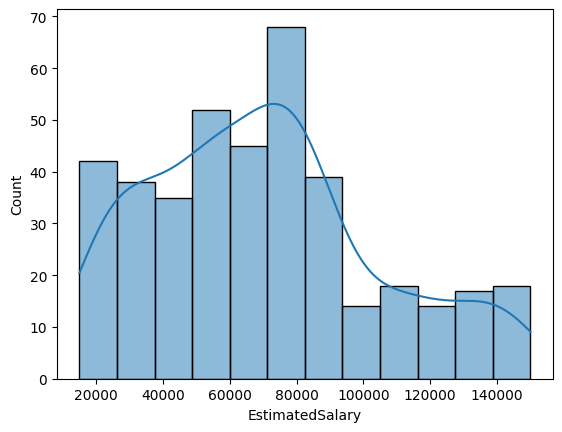

In [ ]:
sns.histplot(dt['EstimatedSalary'], kde = True)

d) Label encoding

In [ ]:
dt['Gender'] = pd.factorize(dt['Gender'])[0]

e) Correlation matrix

In [ ]:
dt.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


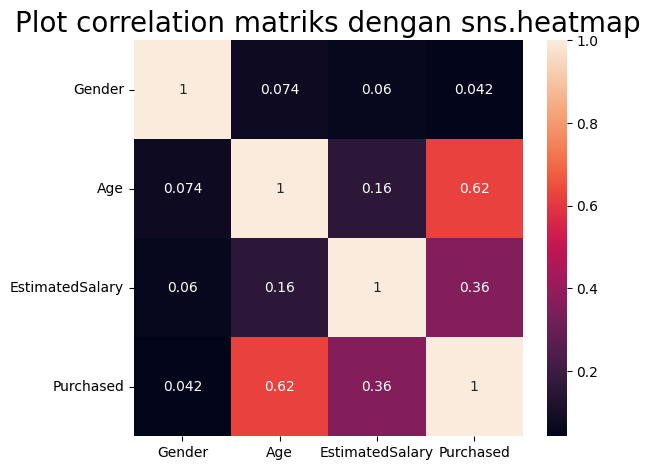

In [ ]:
plt.figure()
sns.heatmap(dt.corr(), annot=True)
plt.title('Plot correlation matriks dengan sns.heatmap', size=20)
plt.tight_layout()
plt.show()

### 4. Split Data

a) Variabel Independen / Dependen

In [ ]:
#split data into dependent/independent variables
X = dt[['Age', 'EstimatedSalary']].values
y = dt.iloc[:, -1].values

b) Train / Test Split

In [ ]:
#Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

## 5. Feature Scaling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 6. Train Model

In [ ]:
#Classifier
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## 7. Predict result / Score model

In [ ]:
# Prediksi
y_pred = classifier.predict (X_test)
print(np.concatenate((y_pred.reshape( len (y_pred), 1), y_test.reshape( len (y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


## 8. Evaluasi model

a) akurasi

In [ ]:
#Accuracy
accuracy_score(y_test, y_pred)

0.82

b) Classification report

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report (y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.83      0.71      0.77        42

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



c) F1 score

In [ ]:
#F1 score
print(f"F score: {f1_score(y_test, y_pred)}")

F score: 0.7692307692307692


d) Confusion matrix

<Axes: >

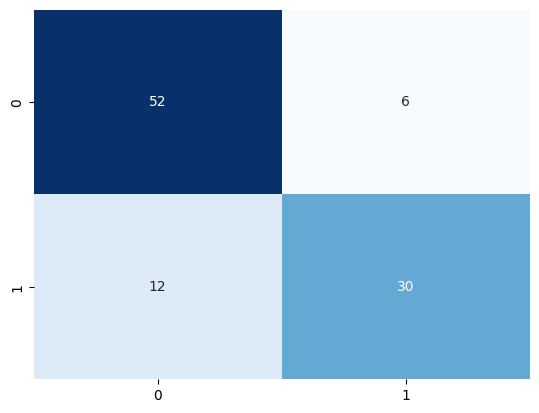

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot= True, fmt="d", cmap="Blues", cbar=False)

e) Precision-Recall curve

In [ ]:
from sklearn.metrics import average_precision_score

# Hitung skor keputusan (decision scores)
y_scores = classifier.decision_function(X_test)

# Hitung average precision
average_precision = average_precision_score(y_test, y_scores)

print(f'Average Precision: {average_precision}')


Average Precision: 0.8450337404892256


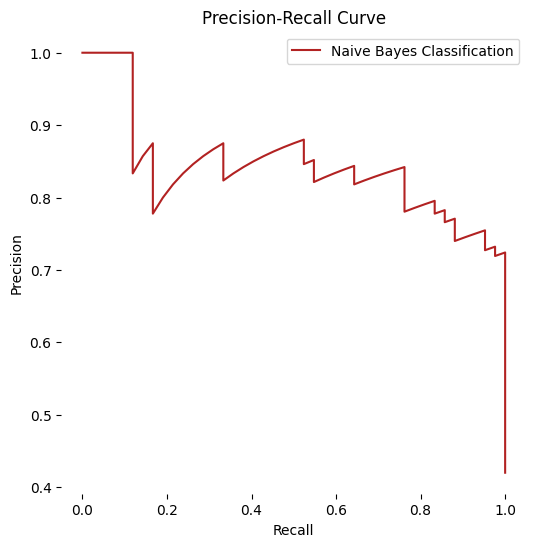

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall, precision, label='Naive Bayes Classification', color='firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

plt.show()


h) AUC / ROC curve

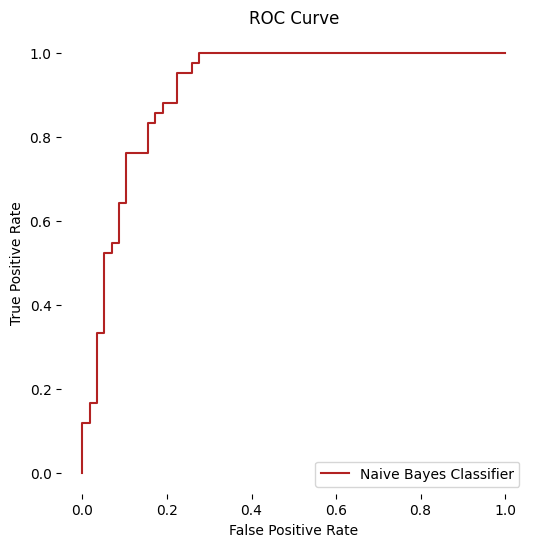

In [ ]:
# Plot AUC/ROC curve
from sklearn.metrics import roc_curve, auc

# Hitung skor keputusan (decision scores)
y_scores = classifier.decision_function(X_test)

# Hitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label='Naive Bayes Classifier', color='firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

plt.show()


## 9. Visualization predictions

**Prediction results on the training set**

<ipython-input-240-12cf35d1472f>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


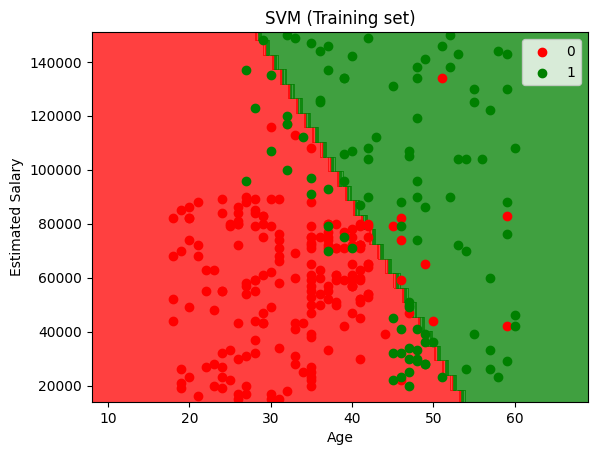

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Prediction results on the test set**

<ipython-input-241-e9f53c3b9d6a>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


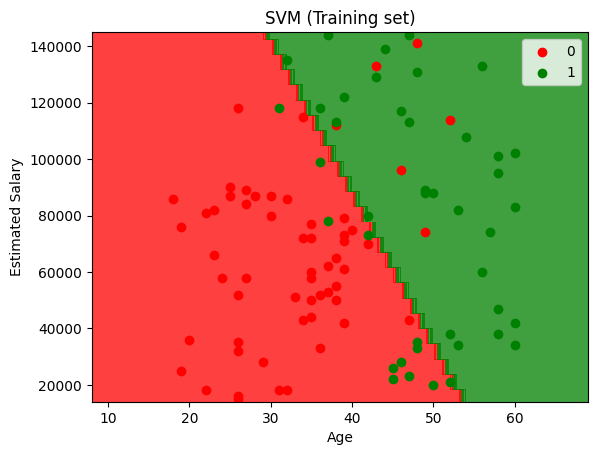

In [ ]:
# Visualize prediction results on test set

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 10. Example

In [ ]:
#Predict purchase with Age (45) and Salary(97000)
print(classifier.predict(sc.transform([[45, 97000]])))

[0]


# Analisis
Pada model dengan Naive Bayes pada dataset social network setelah dilakukan semua langkahnya, lalu di lakukan percobaan hasil pemodelan saat age 45 dan salary 97000. Hasil model menunjukkan 1 yang berarti bahwa pengguna akan membeli asuransi. Lalu pada Support Vector Machine saat dilakukan percobaan hasil pemodelan dengan nilai age dan salary yang sama menunjukkan hasil 0 yang berarti bahwa pengguna tidak akan membeli asuransi. \
Hasil yang berbeda namun dengan nilai Age dan Salary yang sama terjadi karena beberapa kemungkinan diantaranya adalah karena kedua model berjalan dengan pendekatan yang berbeda. Pada Naïve Bayes algoritma berjalan dengan asumsi bahwa semua variabel merupakan variabel independen yang tidak terikat satu sama lain. Namun pada SVM algoritma berjalan dengan mencari nilai hyperplan atau memisahkan kelas data dengan margin yang maksimal.


# Dataset 2

# Praktikum 1 - Naive Bayes

## 1. Import dataset

In [ ]:
datars = pd.read_csv("/content/drive/MyDrive/Dataset data mining/diabetes_RS1.csv")
datars.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Data analisis

In [ ]:
# drop data
datars = datars.drop(['Pregnancies','BloodPressure','SkinThickness','Insulin',
                'BMI','DiabetesPedigreeFunction'], axis = 1)
datars.head()

,Glucose,Age,Outcome
0,148,50,1
1,85,31,0
2,183,32,1
3,89,21,0
4,137,33,1


In [ ]:
# deskripsi data
datars.describe()

,Glucose,Age,Outcome
count,768.000000,768.000000,768.000000
mean,120.894531,33.240885,0.348958
std,31.972618,11.760232,0.476951
min,0.000000,21.000000,0.000000
25%,99.000000,24.000000,0.000000
50%,117.000000,29.000000,0.000000
75%,140.250000,41.000000,1.000000
max,199.000000,81.000000,1.000000


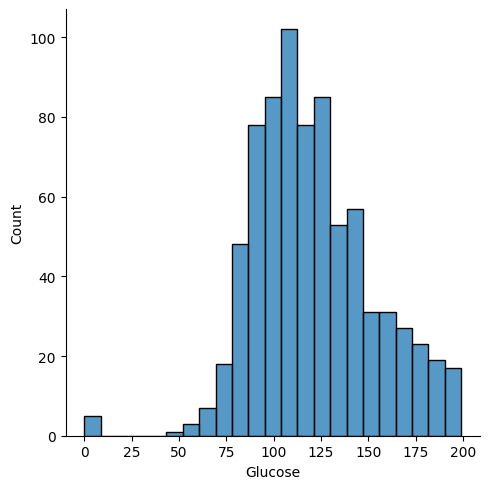

In [ ]:
# distribusi data
sns.displot(datars["Glucose"])

<Axes: >

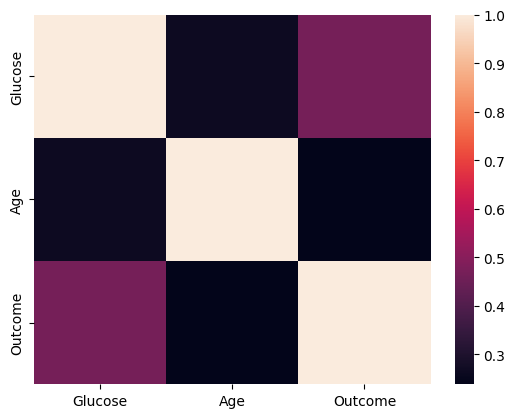

In [ ]:
# korelasi matrix
corr = datars.corr()
sns.heatmap(corr)

## 3. Split Data

In [ ]:
# split data into dependent/independent variables X
X = datars[['Age','Glucose']].values
y = datars.iloc[:, -1].values # kolom purchased atau pembelian

In [ ]:
# split data into test/train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
X_train.shape, X_test.shape

((576, 2), (192, 2))

## 4. Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
# scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Train model

In [ ]:
# classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## 6. Predict result / score model

In [ ]:
# prediksi
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]

## 7. Evaluasi model

In [ ]:
# akurasi
accuracy_score(y_test, y_pred)

0.7552083333333334

In [ ]:
# klasifikasi report
print(f'Classification report : \n{classification_report(y_test, y_pred)}')

Classification report : 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       123
           1       0.71      0.54      0.61        69

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [ ]:
# f1 score
print(f"f1 score: {f1_score(y_test, y_pred)}")

f1 score: 0.6115702479338844


<Axes: >

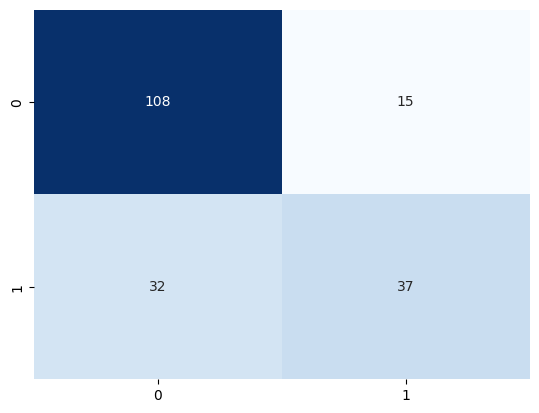

In [ ]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

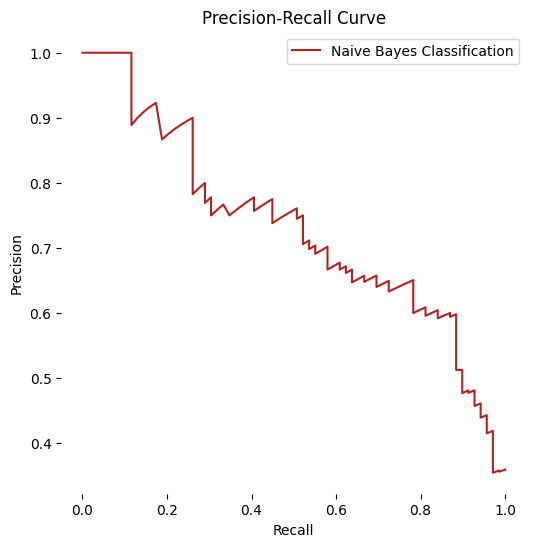

In [ ]:
# plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve (y_test, y_pred_proba)

fig, ax = plt.subplots (figsize = (6,6))
ax.plot (recall, precision, label = 'Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

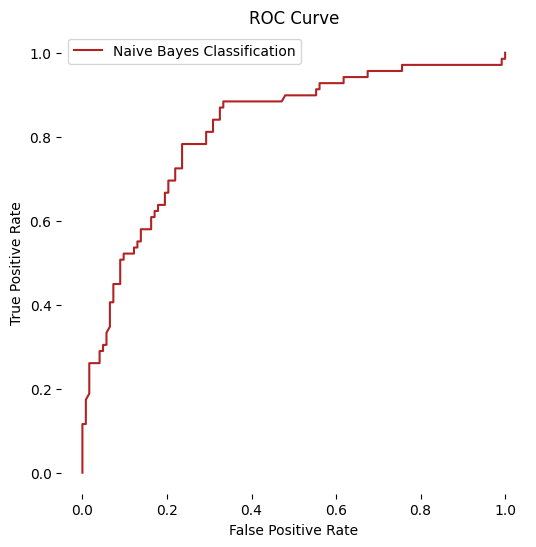

In [ ]:
# plot AUC/ROC curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)
fig, ax = plt.subplots (figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-260-4ae07385a5aa>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


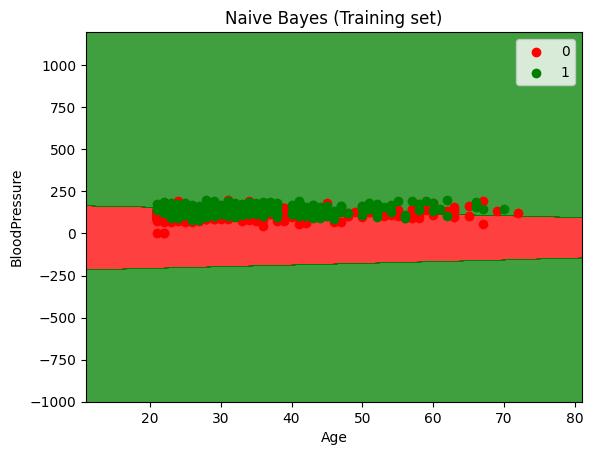

In [ ]:
# visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

<ipython-input-261-2ebf63bf723d>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


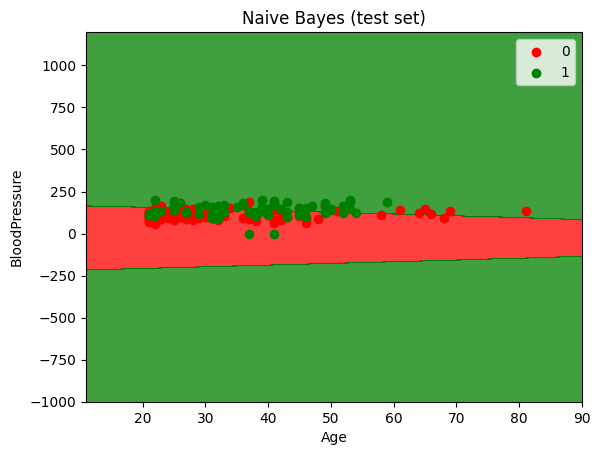

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

In [ ]:
# example glucose 80 and age 42
print(classifier.predict(sc.transform([[80, 42]])))

[0]


# Praktikum 2 - SVM

## 1. Train model

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## 2. Predict result / score model

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]

## 3. Model evaluasi

In [ ]:
# akurasi
acc = accuracy_score(y_pred, y_test)
acc

0.7447916666666666

In [ ]:
# classification report
print(f'Classification report : \n{classification_report(y_test, y_pred)}')

Classification report : 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       123
           1       0.69      0.52      0.60        69

    accuracy                           0.74       192
   macro avg       0.73      0.70      0.70       192
weighted avg       0.74      0.74      0.74       192



In [ ]:
# f1 score
print(f'F1 score : {f1_score(y_test, y_pred)}')

F1 score : 0.5950413223140496


<Axes: >

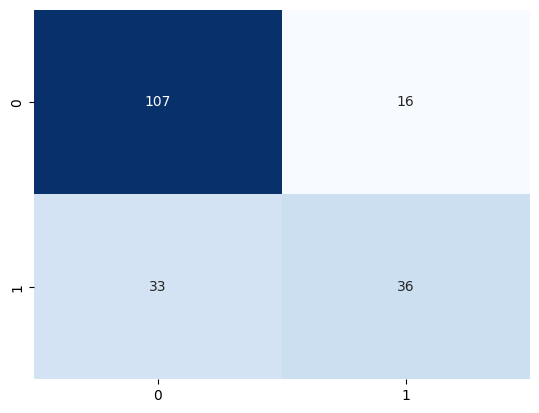

In [ ]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

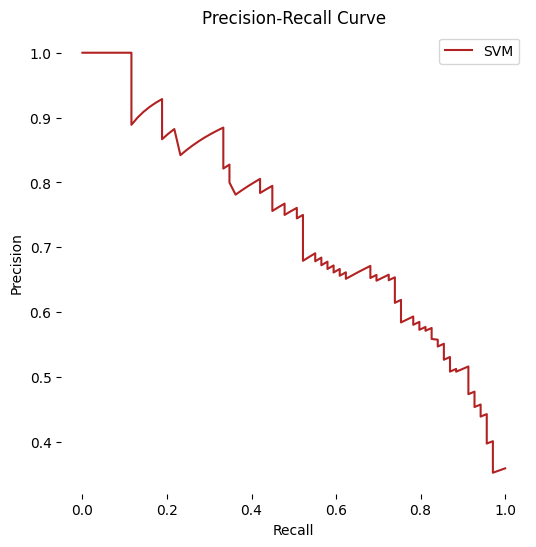

In [ ]:
# precision recall curve plot
y_pred_proba = classifier.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6, 6))
ax.plot(recall, precision, label = 'SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

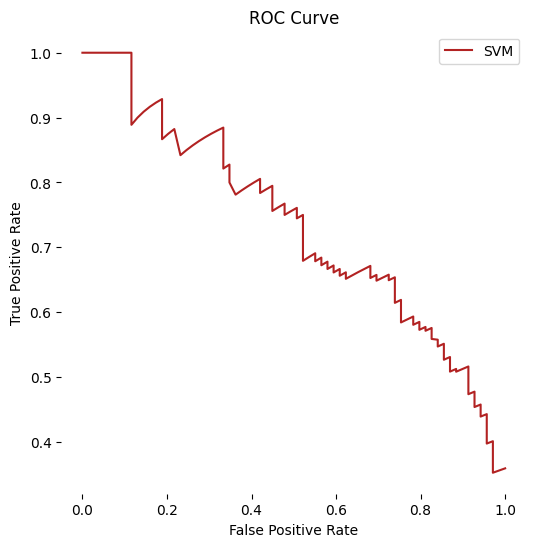

In [ ]:
# AUC / ROC Curve Plot
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6, 6))
ax.plot(recall, precision, label = 'SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-310-612093a2e6c9>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


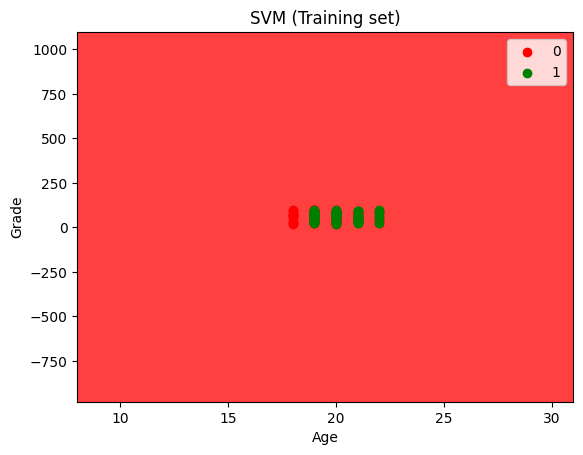

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

<ipython-input-312-cf889b1b6b3c>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


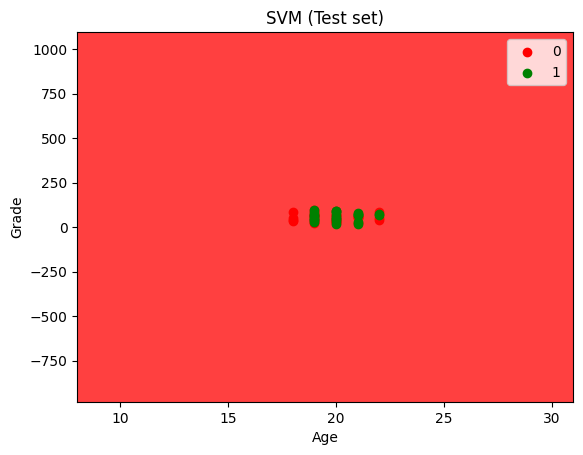

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

In [ ]:
# example glucose 80 and age 42
print(classifier.predict(sc.transform([[80, 42]])))

[0]


# Analisis
Pada pemodelan yang sudah dilakukan selanjutnya dilakukan percobaan dengan nilai glukosa 80 dan umur 42. Lalu dari kedua model menghasilkan nilai 0 yang berarti bahwa pasien tidak terkena diabetes. \
Kedua model menunjukkan hasil yang sama berarti tidak terdapat perbedaan dari kedua pemodelan yang dilakukan.

# Dataset 3

# Praktikum 1 - Naive Bayes

## 1. Import dataset

In [ ]:
student = pd.read_csv("/content/drive/MyDrive/Dataset data mining/Student_bucketing.csv")
student.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


## 2. Data analisis

In [ ]:
# drop data
student = student.drop(['Student_id'], axis = 1)
student.head()

,Age,Grade,Employed,marks
0,19,1st Class,yes,29
1,20,2nd Class,no,41
2,18,1st Class,no,57
3,21,2nd Class,no,29
4,19,1st Class,no,57


In [ ]:
student.isnull()

,Age,Grade,Employed,marks
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
227,False,False,False,False
228,False,False,False,False
229,False,False,False,False
230,False,False,False,False


In [ ]:
# deskripsi data
student.describe()

,Age,marks
count,232.000000,232.000000
mean,19.896552,58.689655
std,1.030944,23.200580
min,18.000000,20.000000
25%,19.000000,37.000000
50%,20.000000,59.500000
75%,21.000000,77.000000
max,22.000000,98.000000


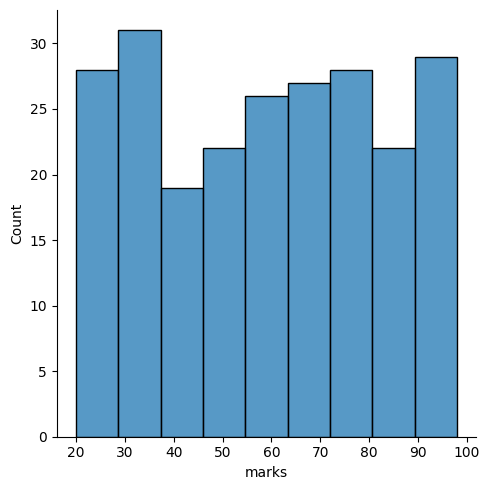

In [ ]:
# distribusi data
sns.displot(student["marks"])

In [ ]:
# label encoding
student_categorical = student.select_dtypes(exclude = [np.number])
student_categorical.head()

,Grade,Employed
0,1st Class,yes
1,2nd Class,no
2,1st Class,no
3,2nd Class,no
4,1st Class,no


In [ ]:
# mengambil nama kolom tipe data kategori
data_column_category = student.select_dtypes(exclude=[np.number]).columns

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# buat objek labelencoder
label_encoder = LabelEncoder()

for i in data_column_category:
  student[i] = label_encoder.fit_transform(student[i])

# hasil
print('Label encoded : ')
student.head(5)

Label encoded : 


,Age,Grade,Employed,marks
0,19,0,1,29
1,20,1,0,41
2,18,0,0,57
3,21,1,0,29
4,19,0,0,57


<Axes: >

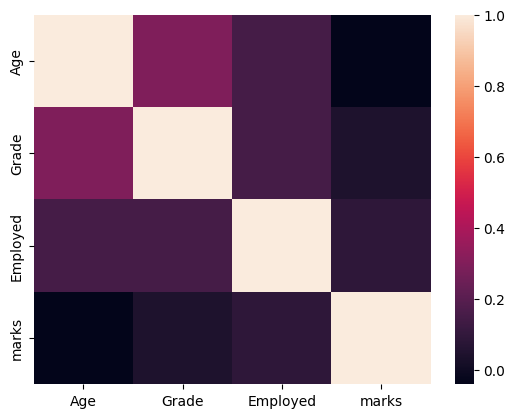

In [ ]:
# korelasi matrix
corr = student.corr()
sns.heatmap(corr)

## 3. Split Data

In [ ]:
# split data into dependent/independent variables X
X = student[['Age','marks']].values
y = student.iloc[:, 2].values # kolom purchased atau pembelian

In [ ]:
# split data into test/train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [ ]:
X_train.shape, X_test.shape

((174, 2), (58, 2))

## 4. Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
# scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Train model

In [ ]:
# classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## 6. Predict result / score model

In [ ]:
# prediksi
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]]


## 7. Evaluasi model

In [ ]:
# akurasi
accuracy_score(y_test, y_pred)

0.603448275862069

In [ ]:
# klasifikasi report
print(f'Classification report : \n{classification_report(y_test, y_pred)}')

Classification report : 
              precision    recall  f1-score   support

           0       0.62      0.85      0.72        34
           1       0.55      0.25      0.34        24

    accuracy                           0.60        58
   macro avg       0.58      0.55      0.53        58
weighted avg       0.59      0.60      0.56        58



In [ ]:
# f1 score
print(f"f1 score: {f1_score(y_test, y_pred)}")

f1 score: 0.34285714285714286


<Axes: >

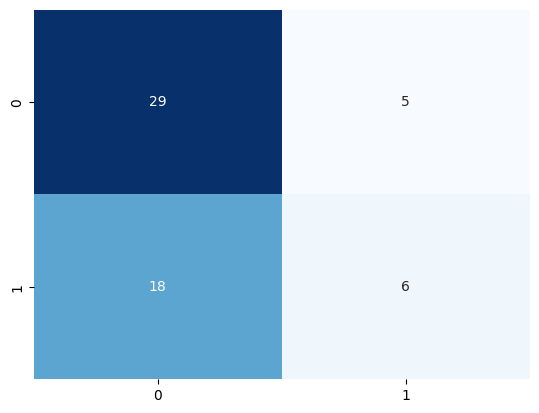

In [ ]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

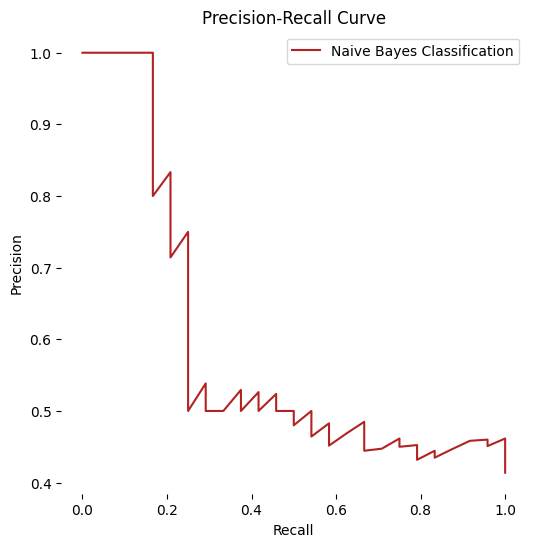

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve (y_test, y_pred_proba)

fig, ax = plt.subplots (figsize=(6,6))
ax.plot (recall, precision, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

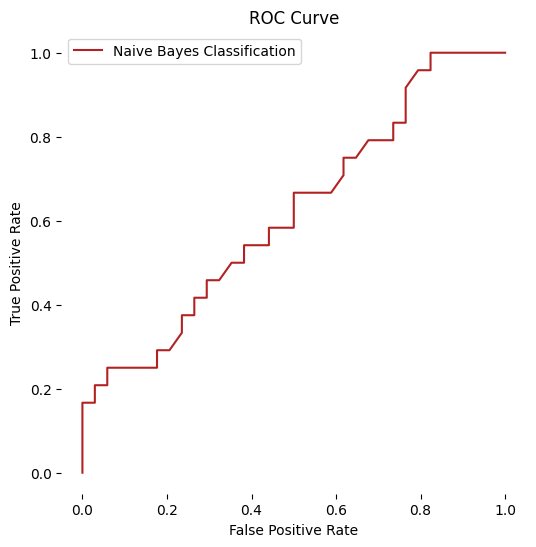

In [ ]:
#Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots (figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-295-658c3353c038>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


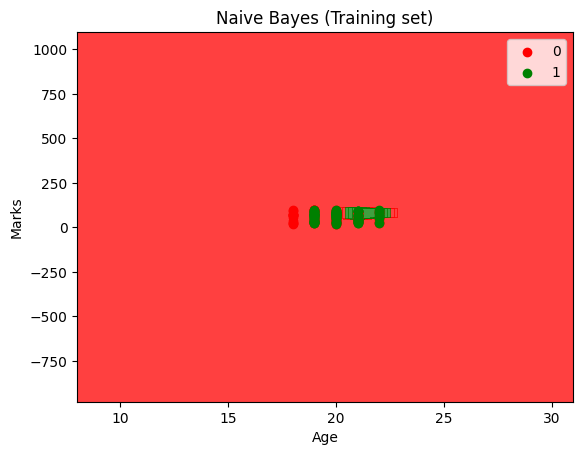

In [ ]:
# visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Marks')
plt.legend()
plt.show()

<ipython-input-296-0bce5c034afb>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


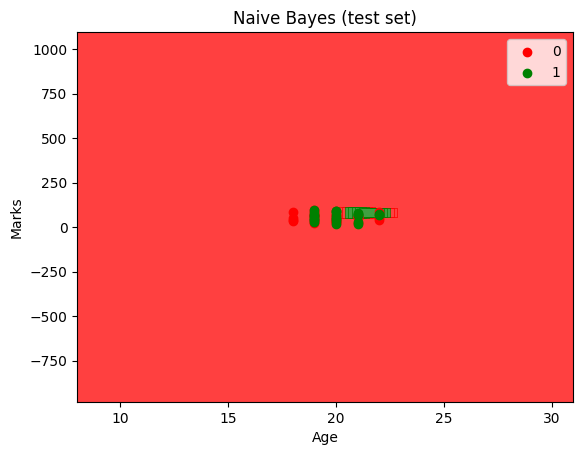

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [ ]:
# example age 18 and marks 50
print(classifier.predict(sc.transform([[18, 50]])))

[0]


# Praktikum 2 - SVM

## 1. Train model

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## 2. Predict result / score model

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]]


## 3. Model evaluasi

In [ ]:
# akurasi
acc = accuracy_score(y_pred, y_test)
acc

0.5862068965517241

In [ ]:
# classification report
print(f'Classification report : \n{classification_report(y_test, y_pred)}')

Classification report : 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        34
           1       0.00      0.00      0.00        24

    accuracy                           0.59        58
   macro avg       0.29      0.50      0.37        58
weighted avg       0.34      0.59      0.43        58



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# f1 score
print(f'F1 score : {f1_score(y_test, y_pred)}')

F1 score : 0.0


<Axes: >

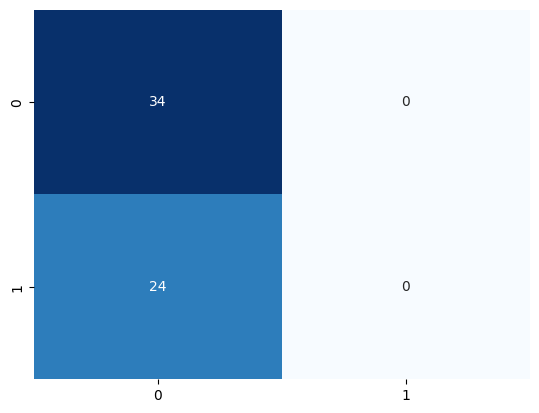

In [ ]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

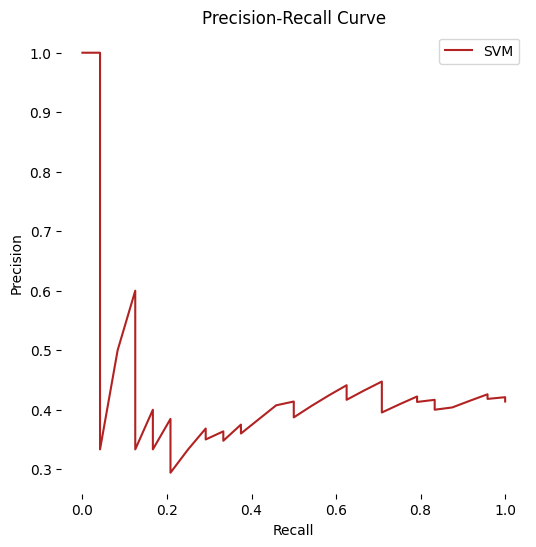

In [ ]:
# precision recall curve plot
y_pred_proba = classifier.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6, 6))
ax.plot(recall, precision, label = 'SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

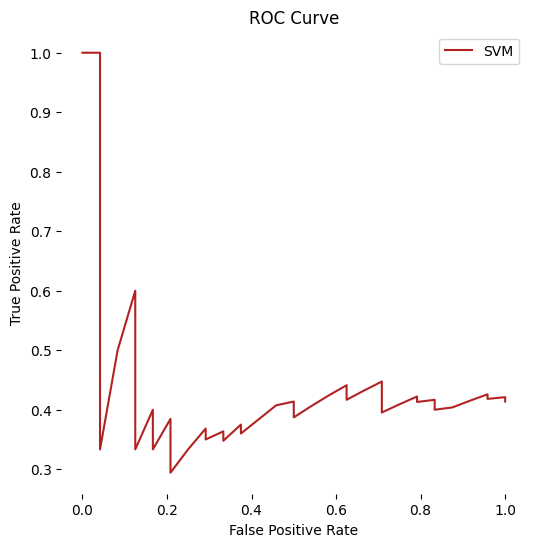

In [ ]:
# AUC / ROC Curve Plot
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6, 6))
ax.plot(recall, precision, label = 'SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

<ipython-input-313-612093a2e6c9>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


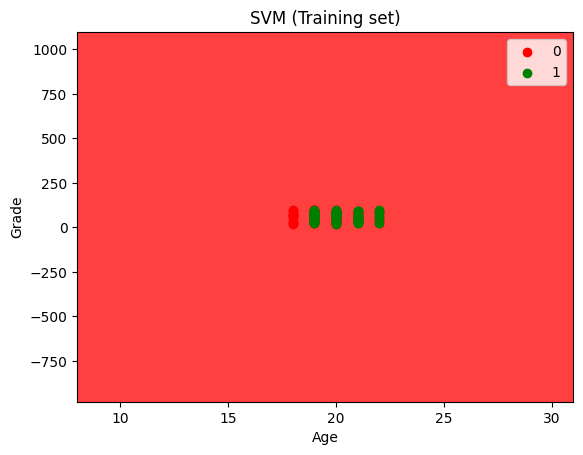

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

<ipython-input-314-139188e0b0a9>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


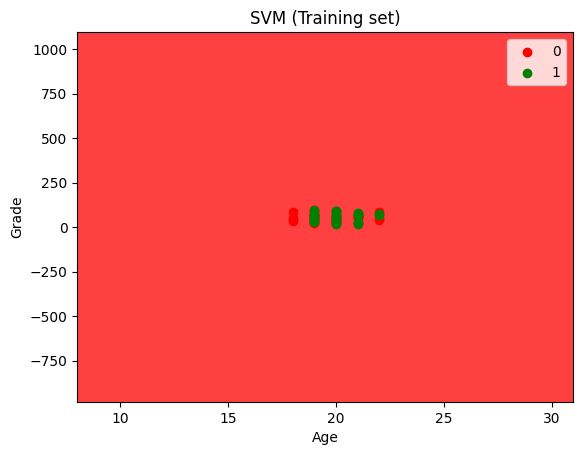

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.legend()
plt.show()

In [ ]:
# example age 18 and marks 50
print(classifier.predict(sc.transform([[18, 50]])))

[0]


# Analisis
Pada kedua pemodelan dilakukan percobaan dengan menggunakan nilai ‘Age’ 18 dan ‘Marks’ 50. Dari kedua model menunjukkan bahwa murid dengan umur 18 dan nilai ujian 50 maka tidak lulus. \
Hasil yang diberikan oleh kedua model adalah sama bahwa siswa dengan umur 18 dan nilai ujian 50 maka tidak lulus atau 0. Hal ini terjadi karena model kemungkinan sudah bisa mengklasifikasikan dengan baik.